In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
import os

In [24]:
dataset_path='Symbol Dataset\dataset'

In [79]:
class_labels=['0','1','2','3','4','5','6','7','8','9','+','.','/','=','*','-','x','y','z']

In [26]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the full dataset
full_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(128, 128),
    batch_size=32,
    shuffle=True
)


Found 10071 files belonging to 19 classes.


In [27]:
# Split the dataset: 70% train, 15% validation, 15% test
dataset_size = len(full_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

In [28]:
train_ds = full_dataset.take(train_size)
val_ds = full_dataset.skip(train_size).take(val_size)
test_ds = full_dataset.skip(train_size + val_size)

In [29]:
import tensorflow as tf
def preprocess(image,labels):
    image=tf.cast(image,tf.float32)/255.0
    return image,labels

In [30]:
train_ds=train_ds.map(preprocess,num_parallel_calls=tf.data.AUTOTUNE)
test_ds=test_ds.map(preprocess,num_parallel_calls=tf.data.AUTOTUNE)
val_ds=val_ds.map(preprocess,num_parallel_calls=tf.data.AUTOTUNE)

In [66]:
def display_random_image(dataset):
    for image, label in dataset.take(1):  # Take one batch from the dataset
        print(tf.shape(image))
        image = image[0].numpy()  # Get the first image in the batch and convert to numpy
        print(image.shape)
        plt.imshow(image)  # Display the image
        plt.axis('off')  # Turn off the axis
        plt.show()  # Show the image
        image = (image * 255).astype(np.uint8)
        return image

tf.Tensor([ 32 128 128   3], shape=(4,), dtype=int32)
(128, 128, 3)


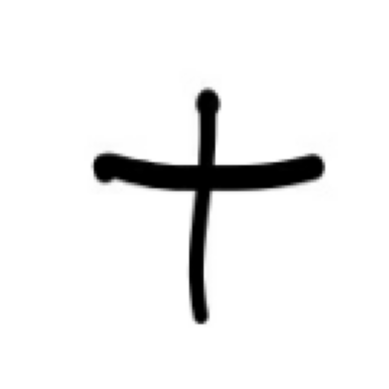

In [68]:
img=display_random_image(train_ds)

In [69]:
cv2.imwrite('test_image.jpg',img)

True

In [70]:
z=cv2.imread('test_image.jpg')
cv2.imshow('hello',z)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
from tensorflow.keras import layers, models
model=Sequential([
    layers.InputLayer(input_shape=(128,128,3)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(19,activation='softmax')


])

d:\UNIVERISTY\GROWTH\CNN based projects\ml_env\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 52s 236ms/step - accuracy: 0.9710 - loss: 0.0951 - val_accuracy: 0.8763 - val_loss: 0.4897
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 52s 238ms/step - accuracy: 0.9791 - loss: 0.0687 - val_accuracy: 0.8989 - val_loss: 0.4279
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 52s 234ms/step - accuracy: 0.9815 - loss: 0.0582 - val_accuracy: 0.9136 - val_loss: 0.4615
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 52s 236ms/step - accuracy: 0.9941 - loss: 0.0213 - val_accuracy: 0.8989 - val_loss: 0.4812
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 51s 231ms/step - accuracy: 0.9851 - loss: 0.0422 - val_accuracy: 0.9102 - val_loss: 0.4940
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 51s 230ms/step - accuracy: 0.9934 - loss: 0.0185 - val_accuracy: 0.8943 - val_loss: 0.6024
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 52s 236ms/step - accuracy: 0.9885 - loss: 0.0349 - val_accuracy: 0.9043 - val_loss: 0.5339
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 51s 233ms/step - accuracy: 0.9934 - loss: 0

In [23]:
test_loss,test_acc=model.evaluate(test_ds,)

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.9218 - loss: 0.4648


In [24]:
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.9018


In [29]:
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range=range(len(acc))



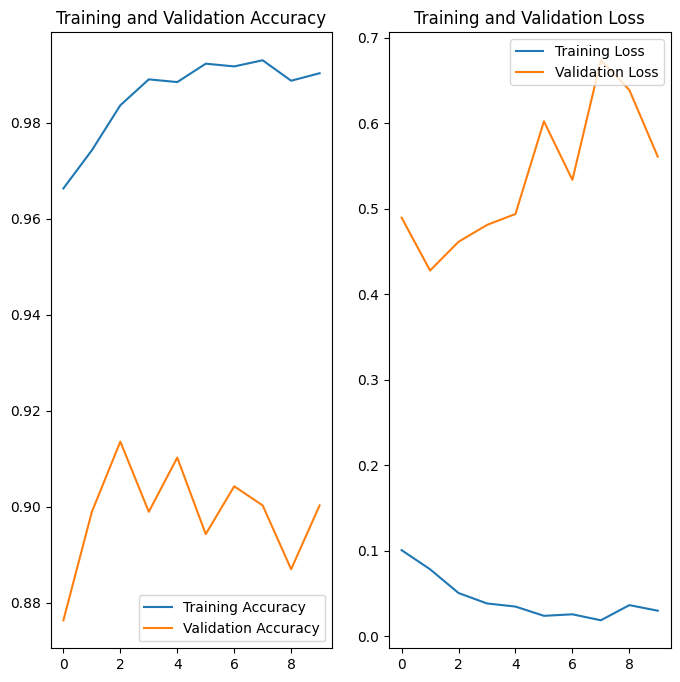

In [30]:

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [32]:
model.save('Symbol_Detector.h5')

In [2]:

import tensorflow as tf
from tensorflow.keras.models import load_model

model=load_model('Symbol_Detector.h5')

In [132]:
random_image_path=r'2_orig.jpg'

This approach dosent have good results

In [133]:
import cv2

random_image=cv2.imread(random_image_path)
cv2.imshow('random image',random_image)



#This image has wrong dimensions so resizing it to 128 128 3 from 318 318 3 

random_image.resize(128,128,3)
ex=np.array(random_image)
print(ex.shape)
cv2.imshow('random image',random_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.waitKey(0)
cv2.destroyAllWindows()
random_image,x=preprocess(random_image,'-')

random_image=tf.expand_dims(random_image, axis=0)
shape = tf.shape(random_image)

# Evaluate the shape tensor to get the actual dimensions (as a NumPy array)
print(shape)  # Output: [2 3]
predictions=model.predict(random_image)
probability=predictions[0]
input_pred_label = np.argmax(probability)

(128, 128, 3)


In [137]:
print(f"Detected symbol is: {class_labels[input_pred_label]} with probability {probability[input_pred_label]:.5f}")

Detected symbol is: z with probability 1.00000


Approach with better results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted class index: 8
Predicted class name: 8
Class probabilities: [6.5059915e-12 4.0410223e-33 1.5015287e-08 5.3840468e-04 1.5784891e-26
 2.1481857e-10 1.1110263e-09 1.1672239e-15 9.9946159e-01 2.2678738e-16
 6.1824520e-24 0.0000000e+00 1.6156012e-11 2.4883706e-15 1.5508583e-10
 1.0465781e-34 3.5160023e-13 1.8801837e-12 1.3214800e-12]


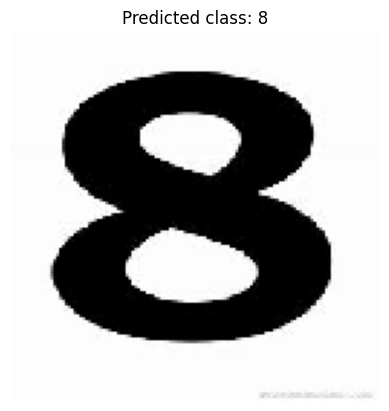

In [143]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define a function to preprocess the random image
def preprocess_random_image(image_path, img_height=128, img_width=128):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Define the path to your random image
random_image_path = '8.jpg'  # Replace with the path to your random image

# Define the class names (in the order of the directory names)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'plus', 'minus', 'multiply', 'divide']

# Load the trained model
#model = tf.keras.models.load_model('path_to_your_saved_model')  # Replace with the path to your saved model

# Preprocess the random image
random_image = preprocess_random_image(random_image_path)

# Predict the class of the random image
predictions = model.predict(random_image)
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class_index]

print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class name: {predicted_class_name}")
print(f"Class probabilities: {predictions[0]}")

# Display the image and prediction
img = image.load_img(random_image_path, target_size=(128, 128))
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.axis('off')
plt.show()


Reason:

Image Resizing:

OpenCV Code:

python
Copy code
```
random_image.resize(128, 128, 3)

```
The resize method from NumPy does not resize the image correctly as it only reshapes the array to the specified shape. This can distort the image data because it doesn't actually resize the image content but rather just changes the dimensions of the array. This will lead to incorrect input data being fed into the model.

Keras Code:

python
```
img = image.load_img(image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
```
The load_img method from Keras correctly resizes the image to the specified dimensions, ensuring that the image content is resized appropriately.